[[ 0.          0.        ]
 [ 0.042       0.01175571]
 [ 0.074      -0.01902113]
 [ 0.103       0.01618034]
 [ 0.133      -0.01618034]
 [ 0.163       0.01618034]
 [ 0.193      -0.01618034]
 [ 0.223       0.01618034]]
[[ 0.          0.        ]
 [ 0.015      -0.04      ]
 [ 0.021       0.01236068]
 [ 0.033      -0.03236068]
 [ 0.041       0.01236068]
 [ 0.053      -0.03236068]
 [ 0.061       0.01236068]
 [ 0.073      -0.03236068]]
[[ 0.00000000e+00  0.00000000e+00]
 [ 3.00000000e-03  4.85410197e-02]
 [ 1.00000000e-02  7.34788079e-18]
 [ 1.30000000e-02 -4.85410197e-02]
 [ 2.00000000e-02  1.98467059e-16]
 [ 2.30000000e-02  4.85410197e-02]
 [ 3.00000000e-02 -2.97700589e-16]
 [ 3.30000000e-02 -4.85410197e-02]]
[[ 0.00000000e+00  0.00000000e+00]
 [ 2.00000000e-03  4.70228202e-02]
 [ 1.00000000e-02  9.79717439e-18]
 [ 1.20000000e-02 -4.70228202e-02]
 [ 2.00000000e-02  2.64622746e-16]
 [ 2.20000000e-02  4.70228202e-02]
 [ 3.00000000e-02 -3.96934118e-16]
 [ 3.20000000e-02 -4.70228202e-02]]
[[ 0

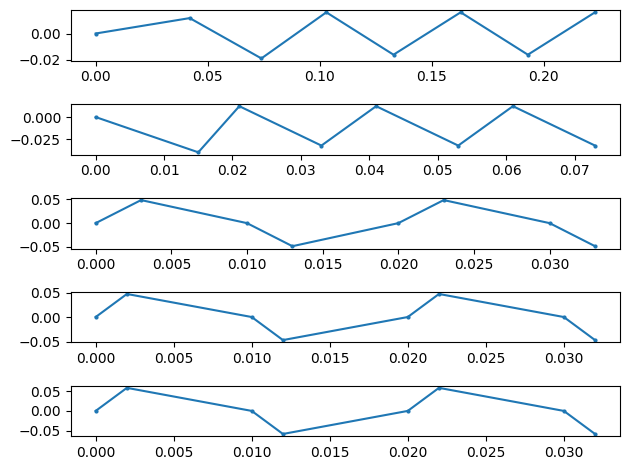

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def create_s_path_fixed_distance(num_points, fixed_distance, amplitude=5, wavelength=10):
    """
    Create an S-shaped path of points with a fixed Euclidean distance between them.
    
    Parameters:
        num_points (int): Total number of points.
        fixed_distance (float): Euclidean distance between consecutive points.
        amplitude (float): Amplitude of the S-shape.
        wavelength (float): Wavelength of the sine wave.
        
    Returns:
        np.ndarray: Array of shape (num_points, 2) containing the points.
    """
    # Initialize the path
    points = np.zeros((num_points, 2))  # Store (x, y) coordinates
    points[0] = [0, 0]  # Start at the origin (0, 0)

    # Track the total arc length covered
    total_arc_length = 0

    for i in range(1, num_points):
        # Binary search for the next point to ensure fixed distance
        x_prev, y_prev = points[i - 1]
        arc_found = False
        x = x_prev
        while not arc_found:
            x += 0.001  # Increment x slightly
            y = amplitude * np.sin(2 * np.pi * x / wavelength)
            dist = np.sqrt((x - x_prev)**2 + (y - y_prev)**2)
            if dist >= fixed_distance:
                arc_found = True
                points[i] = [x, y]
                total_arc_length += dist

    return points

num = 5
# Parameters
num_points = 8          # Total number of points
fixed_distance = 0.042      # Euclidean distance between consecutive points
wavelength = 0.02           # Wavelength of the sine wave

#Different Targets
amplitude = 0.1             # Amplitude of the S-shape
amp_list = np.linspace(amplitude/num, amplitude, num=num)

f, ax = plt.subplots(num, 1)

for amp, ax in zip(amp_list, ax):
    # Generate the S-shaped path
    s_path = create_s_path_fixed_distance(num_points, fixed_distance, amp, wavelength)
    print(s_path)
    # Plot the S-shaped path
    ax.plot(s_path[:, 0], s_path[:, 1], '-o', markersize=2, label="S-Path")
plt.tight_layout()
plt.show()